<a href="https://colab.research.google.com/github/MissingSemesterCUET/ML/blob/main/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lemonade analogy
- Prepare a lemonade
- Serve it to your customers
- Observe their reactions
- Adjust the recipe based on their feedback

# The "Hello World" of ML
We are going to predict Apartment Prices in Dhaka.

(Relate to the lemonade analogy along the way)

The Goal: Transition from "Human Learning" (adjusting a slider) to "Machine Learning" (writing a loop).

Price of house in Dhaka

| Size (1000 sq. ft) | Price (Crore Taka) |
| --- | --- |
| 1.5 | 1.30 |
| 1.8 | 1.60 |
| 1.0 | 1.20 |
| 2.0 | 1.70 |
| 2.2 | 1.85 |
| 0.5 | 0.80 |
| 2.5 | 2.15 |
| 2.8 | 2.45 |
| 0.2 | 0.55 |

What would be the price of a house of 2100 sqft?

Let's plot

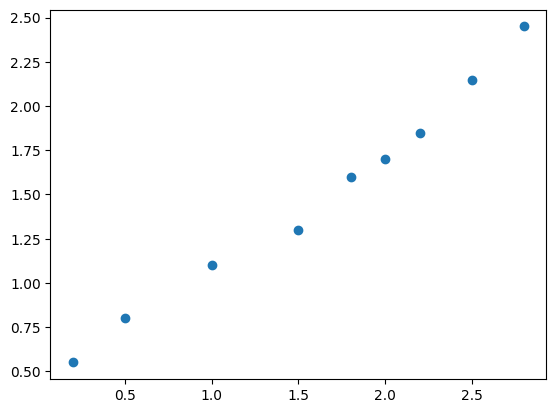

In [37]:
import torch
import matplotlib.pyplot as plt

size = torch.tensor([1.5, 1.8, 1.0, 2.0, 2.2, 0.5, 2.5, 2.8, 0.2])
price = torch.tensor([1.30, 1.600, 1.10, 1.700, 1.850, 0.8, 2.150, 2.450, 0.55])

plt.plot(size, price, 'o')

What would be the price of a house of 2000 sqft?

In [46]:
from ipywidgets import interact

@interact(m=(0.5, 0.9, 0.01), b=(0.1, 0.5, 0.01))
def plot(m, b):
    price_prediction = m * size + b
    plt.plot(size, price, 'o')
    plt.plot(size, price_prediction)
    plt.ylim(0, 3)
    plt.xlim(0, 3)

interactive(children=(FloatSlider(value=0.69, description='m', max=0.9, min=0.5, step=0.01), FloatSlider(value…

In [44]:
def mae(y_true, y_pred):
    return torch.mean(torch.abs(y_true - y_pred))

In [47]:
@interact(m=(0.5, 0.9, 0.01), b=(0.1, 0.5, 0.01))
def plot(m, b):
    price_prediction = m * size + b
    plt.plot(size, price, 'o')
    plt.plot(size, price_prediction)
    plt.ylim(0, 3)
    plt.xlim(0, 3)
    plt.title(f"MAE = {mae(price, price_prediction)}")

interactive(children=(FloatSlider(value=0.69, description='m', max=0.9, min=0.5, step=0.01), FloatSlider(value…

In [48]:
0.66 * 2.1 + 0.41

1.796

## Can we automate?

Meet **gradient descent**.

Gradient is just a fancy word for "slope".

(Draw a quadratic curve on whiteboard)
Imagine you live in a 2D world. The only thing you can do is move forward (positive x-direction) or backward (negative x-direction). You are blindfolded on a curvy path. You can't see the path, but you can feel the slope at your feet. You want to get to the bottom of the curve. How would you do it?

You put one foot in front, to feel the slope. You feel that the land is higher in front. So, where should you go? Backward! So, you move backward. You keep doing this until you reach the bottom of the curve.

(use the same analogy later to show: learning rate, why learning rate is multiplied with slope, multiple minima, plateau)

Mathematically, the "direction" is the negative of the **gradient** (derivative) of the loss with respect to the weights.

In [646]:
def mse(y_true, y_pred):
    return torch.mean(torch.pow(y_true - y_pred, 2))

In [647]:
# PyTorch can automatically compute gradients for us using `autograd`.
# We just need to set `requires_grad=True` for the tensors we want to optimize.

m = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

print(f"Initial values: m={m}, b={b}")

Initial values: m=tensor([1.], requires_grad=True), b=tensor([1.], requires_grad=True)


In [648]:
price_pred = m * size + b

error = mse(price, price_pred)
error.backward()

print(m.grad)
print(b.grad)
print(error.item())

tensor([4.0144])
tensor([2.2222])
1.3066667318344116


In [706]:
with torch.no_grad():
    m -= 0.0001 * m.grad
    b -= 0.0001 * b.grad


price_pred = m * size + b

error = mse(price, price_pred)
error.backward()

print(m.item(), m.grad)
print(b.item(), b.grad)
print(error.item())

0.46259236335754395 tensor([137.1191])
0.6969627141952515 tensor([79.5991])
0.04582642763853073


- Learning rate and epoch - Think like a experimental scientist
- Hyperparameters vs learning parameters